In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%%time
master_data = pd.read_csv('hpc_breakdowns.csv', infer_datetime_format=True, parse_dates={'Datetime':[1,2]})
master_data.head()

Wall time: 23.7 s


,Datetime,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
master_data.shape

In [ ]:
master_data.info()

In [ ]:
master_data.head(10)

### Now we are going to combine date and time into a single column and convert them into a Datetime object to use them in training

In [ ]:
master_data.head(100)

In [ ]:
master_data.info()

#### Now we need to check if there are any duplicate columns based on the newly created Datetime Object

In [3]:
# We get the index of the columns that are duplicates and convert them into an array
master_data['Duplicates_based_on_time'] = master_data.duplicated('Datetime')
index_of_duplicates = master_data.index[master_data['Duplicates_based_on_time'] == True].tolist()
print(index_of_duplicates)
master_data.drop_duplicates('Datetime',keep='first') #This code can be executed if there  are any duplicates found

[]


,Datetime,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Duplicates_based_on_time
0,2006-12-16 17:24:00,0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,False
1,2006-12-16 17:25:00,1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,False
2,2006-12-16 17:26:00,2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,False
3,2006-12-16 17:27:00,3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,False
4,2006-12-16 17:28:00,4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,False
...,...,...,...,...,...,...,...,...,...,...
2049275,2010-11-26 20:58:00,2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,False
2049276,2010-11-26 20:59:00,2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,False
2049277,2010-11-26 21:00:00,2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,False
2049278,2010-11-26 21:01:00,2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,False


In [4]:
# As we have now processed duplicates we can delete the column created to map duplicates
master_data.drop('Duplicates_based_on_time',axis=1,inplace=True)

#### As we can see there are no Duplicates we can proceed further. However if we find any duplicates in the future we can find and drop them as above

### Now we find the correlation between the features using heatmap  from Seaborn

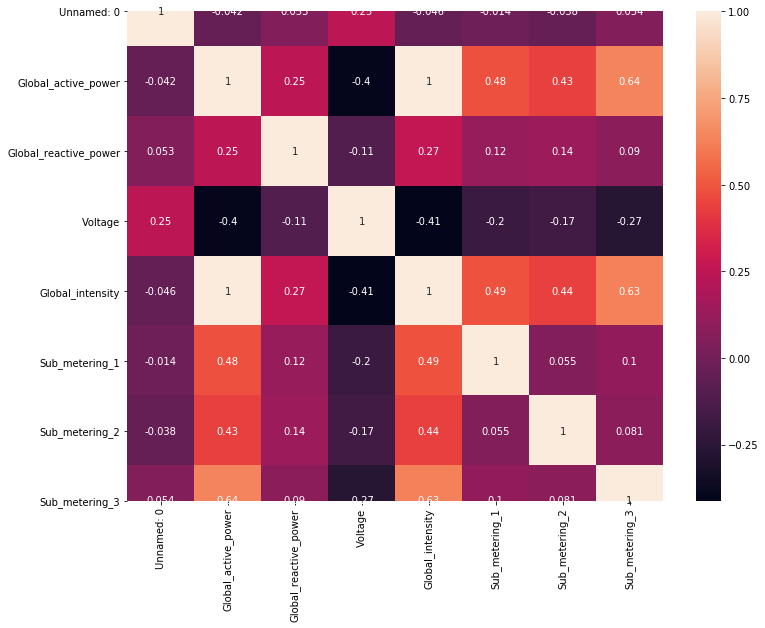

In [5]:
corrmat = master_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True);

#### Assumptions
* Global Active Power is highly correlated with Global Intensity
* All the sub meter features have some sort of Correlation with Global Intensity but Sub_Metering_3 has te highest
* What you can also see is that Voltage has a Negative Correlation with Global Intensity. This could also be because of the General concept of Increase in Voltage there occurs a decrease in Current
* What we can also see is that both Global Active Power and Unnamed_0 columns have lesser Correlation than other columns.
* We will keep Global ReActive Power and remove the Unnamed_0 column as it seems to be of no use in our analysis

In [7]:
master_data.drop('Unnamed: 0',axis=1,inplace=True)
master_data.head(100)

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
95,2006-12-16 18:59:00,4.224,0.090,231.96,18.2,0.0,1.0,16.0
96,2006-12-16 19:00:00,4.070,0.088,231.99,17.4,0.0,1.0,17.0
97,2006-12-16 19:01:00,3.612,0.090,232.36,15.6,0.0,2.0,16.0
98,2006-12-16 19:02:00,3.458,0.090,232.71,14.8,0.0,1.0,17.0


In [8]:
# As we have converted the individual date and time columns into a new Datetime Column we can remove these two columns
# But before deleting lets take a copy of the entire dataframe
master_data_copy = master_data.copy()
master_data_copy.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
master_data.head()

### Now we are going to extract the datetime into two more columns such as Weekday and Month for the following purposes
* To see if specific weekdays/months have any impact on the Global Intensity

In [ ]:
master_data_copy['Day_of_week'] = master_data_copy['Datetime'].dt.dayofweek
master_data_copy['Month'] = master_data_copy['Datetime'].dt.month
master_data_copy.head()

#### Now as we have separated the Day of week and Month into two separate columns, we can plot them with Global Intensity to check their relation

In [ ]:
sns.relplot(x='Day_of_week',y='Global_intensity',data=master_data_copy)

In [ ]:
sns.relplot(x='Month',y='Global_intensity',data=master_data_copy)

### Now we once again plot the Heatmap to check the correlation of Global Intensity for Day of week and Month

In [ ]:
corrmat_new = master_data_copy.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat_new, annot=True);

#### As we can see from the above month and day of the week does not have much correlation with Global Intensity
* We generally consider correlations above 0.4 to be relatively strong; correlations between 0.2 and 0.4 are moderate, and those below 0.2 are considered weak.
* So we can delete them

In [ ]:
master_data_copy.drop(['Day_of_week','Month'],axis=1,inplace=True)

In [ ]:
master_data_copy.isnull().sum()

In [ ]:
master_data_copy.isna().sum()

### Now we will check the percentage of missing values compared to whole dataset

In [9]:
total = master_data_copy.isnull().sum().sort_values(ascending=False)
percent = ((master_data_copy.isnull().sum()/master_data_copy.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Global_active_power,2043,0.099694
Voltage,2031,0.099108
Global_intensity,2001,0.097644
Sub_metering_1,1297,0.063291
Sub_metering_2,1210,0.059045
Global_reactive_power,477,0.023276
Sub_metering_3,129,0.006295
Datetime,0,0.000000


As we can see from the above table the percentage of missing values is less. Hence we can delete the rows containing missing values

Now we try and remove the rows that has null values in columns Sub_metering_1 ,Sub_metering_2 ,Sub_metering_3 and Global_reactive_power

In [10]:
master_data_copy.dropna(subset=['Sub_metering_1','Sub_metering_2','Global_reactive_power','Sub_metering_3'],inplace=True)

In [11]:
total = master_data_copy.isnull().sum().sort_values(ascending=False)
percent = (master_data_copy.isnull().sum()/master_data_copy.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Global_active_power,2016,0.000985
Global_intensity,2001,0.000978
Voltage,1983,0.000969
Sub_metering_3,0,0.000000
Sub_metering_2,0,0.000000
Sub_metering_1,0,0.000000
Global_reactive_power,0,0.000000
Datetime,0,0.000000


In [ ]:
sns.countplot(x="Global_active_power",data=master_data_copy)

In [ ]:
sns.countplot(x="Global_intensity",data=master_data_copy)

In [ ]:
sns.countplot(x="Voltage",data=master_data_copy)

From the graphs dispalyed above we shall now fill the missing values of voltage using mean and use the value of median for the other two columns

In [12]:
voltage_Null = master_data_copy[master_data_copy['Voltage'].isnull()].copy().index.tolist()
master_data_copy['Voltage'].iloc[voltage_Null] = master_data_copy['Voltage'].mean()
gi_Null = master_data_copy[master_data_copy['Global_intensity'].isnull()].copy().index.tolist()
master_data_copy['Global_intensity'].iloc[gi_Null] = master_data_copy['Global_intensity'].median()
gap_Null = master_data_copy[master_data_copy['Global_active_power'].isnull()].copy().index.tolist()
master_data_copy['Global_active_power'].iloc[gap_Null] = master_data_copy['Global_active_power'].median()

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
master_data_copy.dropna(subset=['Global_active_power','Global_intensity','Voltage'],inplace=True)

As we have filled the datas now we check once for empty values once again just to confirm that we have removed them completly

In [14]:
total = master_data_copy.isnull().sum().sort_values(ascending=False)
percent = (master_data_copy.isnull().sum()/master_data_copy.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Sub_metering_3,0,0.0
Sub_metering_2,0,0.0
Sub_metering_1,0,0.0
Global_intensity,0,0.0
Voltage,0,0.0
Global_reactive_power,0,0.0
Global_active_power,0,0.0
Datetime,0,0.0


In [ ]:
master_data_copy.shape

### Now we will check for outliers

There are many different ways to check for outliers.But the most commomly used ways are
* BoxPLot
* Scatter Plot
* ZScore
* IQR(Inter quartile range) Score

In this project I will be using Boxplot and IQR Score

In [ ]:
sns.boxplot(x=master_data_copy['Global_active_power'])

In [ ]:
sns.boxplot(x=master_data_copy['Global_reactive_power'])

In [ ]:
sns.boxplot(x=master_data_copy['Voltage'])

In [ ]:
sns.boxplot(x=master_data_copy['Sub_metering_1'])

In [ ]:
sns.boxplot(x=master_data_copy['Sub_metering_2'])

In [ ]:
sns.boxplot(x=master_data_copy['Sub_metering_3'])

We can see that there are a considerable amount of Outliers from the above graphs

To be more specfic we will also use IQR score now to find the percentage of Outliers in our Data

In [ ]:
Q1 = master_data_copy[['Global_active_power','Global_reactive_power','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3']].quantile(0.25)
Q3 = master_data_copy[['Global_active_power','Global_reactive_power','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
masterdata_withoutdatetime = master_data_copy.drop('Datetime',axis=1)
master_data_out = masterdata_withoutdatetime[~((masterdata_withoutdatetime < (Q1 - 1.5 * IQR)) |(masterdata_withoutdatetime > (Q3 + 1.5 * IQR))).any(axis=1)]
newrows,newcolumns = master_data_out.shape
custom_rows,custom_columns = masterdata_withoutdatetime.shape

In [ ]:
percentage_of_outliers = ((custom_rows-newrows)/custom_rows)*100
print("Percentage of Outliers is {}".format(percentage_of_outliers))

Based on the above assumptions we can come to the following conclusions regarding the outliers
* The amount of outliers are neither too small to remove nor too big to neglect

### Now we shall use pair plot to see if there are any relations between the features an Global Intensity

In [ ]:
sns.pairplot(master_data_copy,height=3)

Now we are creating a new Column called GI_range to map the rows which has values greator than 15

In [23]:
def gi_greator(row):
    if row > 15:
        val = 1
    else:
        val = 0
    return val

In [24]:
%%time
master_data_copy['GI_range'] = master_data_copy['Global_intensity'].apply(lambda x: gi_greator(x))

Wall time: 2.35 s


In [ ]:
master_data_copy.head(100)

In [ ]:
print(master_data_copy[master_data_copy['GI_range'] == 0].shape[0])

In [ ]:
count_of_ones = master_data_copy.shape[0] - master_data_copy[master_data_copy['GI_range'] == 0].shape[0]

In [ ]:
print("Perrcentage of Zeros : ",(count_of_ones/master_data_copy.shape[0])*100)

As the value range in features are not much diverse, we don't prefer for normalization and scaling for this dataset

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

We have imported the Gradient Boosting Regressor Algorithm. Now we shall try and separate the dataset into two parts
* One with train and test data
* Other for Validation Dataset

In [25]:
rows,columns = master_data_copy.shape

In [26]:
rows

2040196

In [27]:
validation_data = master_data_copy.tail(200000)

In [28]:
validation_data.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,GI_range
1848802,2010-07-02 00:00:00,0.676,0.000,242.60,2.8,0.0,0.0,0.0,0
1848803,2010-07-02 00:01:00,0.788,0.156,241.88,3.4,0.0,0.0,1.0,0
1848804,2010-07-02 00:02:00,0.782,0.164,242.52,3.2,0.0,0.0,1.0,0
1848805,2010-07-02 00:03:00,0.778,0.164,242.35,3.2,0.0,0.0,0.0,0
1848806,2010-07-02 00:04:00,0.776,0.162,242.34,3.2,0.0,0.0,1.0,0


In [29]:
train_test_data = master_data_copy.head(rows-200000)

In [30]:
train_test_data.tail()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,GI_range
1848797,2010-07-01 23:55:00,0.676,0.0,242.96,2.8,0.0,0.0,1.0,0
1848798,2010-07-01 23:56:00,0.678,0.0,243.51,2.8,0.0,0.0,1.0,0
1848799,2010-07-01 23:57:00,0.678,0.0,243.50,2.8,0.0,0.0,0.0,0
1848800,2010-07-01 23:58:00,0.678,0.0,243.00,2.8,0.0,0.0,1.0,0
1848801,2010-07-01 23:59:00,0.676,0.0,242.90,2.8,0.0,0.0,1.0,0


In [31]:
from sklearn import model_selection

In [32]:
X = train_test_data.drop(['Datetime','Global_intensity','GI_range'],axis=1)
y = train_test_data['Global_intensity']

In [ ]:
X.head()

In [ ]:
y.head()

Now we use Kfold to evaluate our model and perform fine tuning of the hyper parameters required to attain maximum accuracy

I tried the follwoing values of n_estimators
* 1
* 3
* 10
* 30
* 100

In [ ]:
%%time
kfold = model_selection.KFold(n_splits=10,random_state=45,shuffle=True)
model = GradientBoostingRegressor(n_estimators=300,random_state=45)
results = model_selection.cross_val_score(model,X,y,cv=kfold)
print(results.mean())

I have listed below the Mean Cross Val Scrore attained for each n_estimators
* 1 - 0.18423142630493133
* 3 - 0.45604235717940567
* 10 - 0.8651795214375403
* 30 - 0.9928189187838832
* 100 - 0.9965
* 300 - 0.9969376234572886

As we can see we have got a value of 0.992 when we try n_estimators of 30. We can try to improve n_estimators of 100, but the resources used will be more and the improvement obtained will be meagre
* So we stick with n_estimators = 30

We will now split the data into Training and testing to train the model

In [33]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.1, random_state=9,shuffle=True)

In [ ]:
gbrtest = GradientBoostingRegressor()
n_params = {'n_estimators':[300,1000,3000],'loss':['ls', 'lad', 'huber', 'quantile']}

In [ ]:
grid_search = model_selection.GridSearchCV(gbrtest,n_params,cv=5)

In [ ]:
%time grid_search.fit(X_train,y_train)

In [38]:
%%time
gbr = GradientBoostingRegressor(n_estimators=300,random_state=9,max_depth=5)

Wall time: 1e+03 µs


In [39]:
%%time
gbr.fit(X_train,y_train)

Wall time: 30min 25s


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=9, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Text(0, 0.5, 'Feature Importance Score')

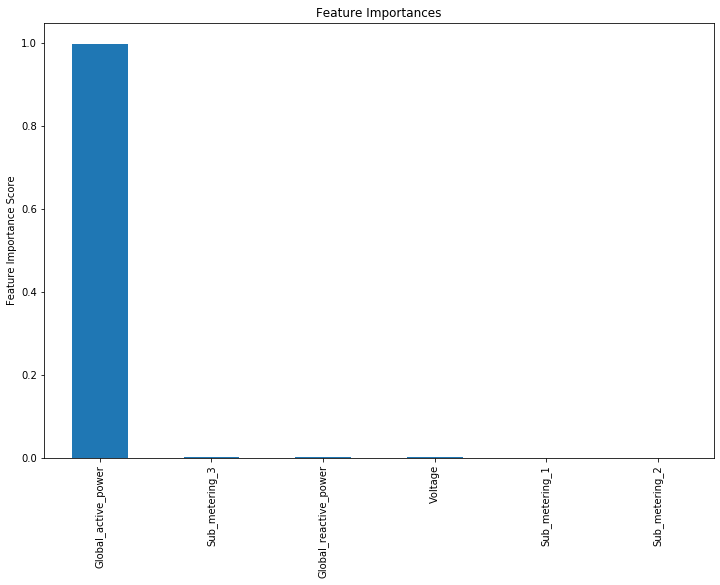

In [40]:
feat_imp = pd.Series(gbr.feature_importances_, X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances',figsize=(12,8))
plt.ylabel('Feature Importance Score')

In [41]:
y_predict = gbr.predict(X_test)

In [42]:
from sklearn import metrics

In [43]:
test_accuracy = (gbr.score(X_test,y_test))*100

In [44]:
test_accuracy

99.75545765410826

We have got a accuracy score of 99.29. Now we shall try and run the model in the validation data that we have to obtain the validation score of this model

This is the original accuracy score as it is tested in a real world data

* 100 - 99.75354460033381
* 300 - 99.75545765410826
* 1000 - 99.6967442010837

In [45]:
X_valid = validation_data.drop(['Datetime','Global_intensity','GI_range'],axis=1)
y_valid = validation_data['Global_intensity']

In [46]:
valid_accuracy = (gbr.score(X_valid,y_valid))*100

In [47]:
valid_accuracy

99.77401224195036

* 100 - 99.76982114932565
* 300 - 99.77401224195036
* 1000 - 99.77044199388477

The most remarkable thing is that our accuracy has imporved. We can come to a following set of conclussions
* The improvement indicates that our model has performed better with real world data
* Though the improvement is by luck, it points out one clear point saying that our model will give a accuracy score above 98 on average when we run it in real world scenarios

## The second objective of our Project is to predict global intensity greator than 15

For this we have already created a column called GI_range which is set to 1 if Intensity is greator than 15 and 0 if it is less

This is basically a Classification Model so we will use Gradient Boosting Classification for this

In [48]:
X_two = train_test_data.drop(['Datetime','Global_intensity','GI_range'],axis=1)
y_two = train_test_data['GI_range']

In [49]:
X_train_two,X_test_two,y_train_two,y_test_two = model_selection.train_test_split(X_two,y_two,test_size=0.2,random_state=9)

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
gbr_class = GradientBoostingClassifier(n_estimators=300,random_state=9)

In [54]:
%%time
gbr_class.fit(X_train_two,y_train_two)

Wall time: 17min 38s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=9, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [55]:
test_accuracy_two = (gbr_class.score(X_test_two,y_test_two))*100

In [56]:
test_accuracy_two

99.91278121943267

In [57]:
X_two_valid = validation_data.drop(['Datetime','Global_intensity','GI_range'],axis=1)
y_two_valid = validation_data['GI_range']

In [58]:
valid_predict = gbr_class.predict(X_two_valid)

In [61]:
print("Accuracy:", metrics.accuracy_score(valid_predict,y_two_valid)*100)

Accuracy: 99.9315


Classification Matrix is given below

In [60]:
print(metrics.classification_report(valid_predict,y_two_valid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    196476
           1       0.97      0.99      0.98      3524

    accuracy                           1.00    200000
   macro avg       0.99      0.99      0.99    200000
weighted avg       1.00      1.00      1.00    200000

